This is my Jupitar Notebook for Kaggle competition /  Titanic - Machine Learning from Disaster
@Tharindu AKA Tardi

In [8]:
#import libraries

import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation

import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier


# Model evaluation

from sklearn.model_selection import cross_val_score

# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

In [9]:
#import and read the data

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [10]:
#Display the first few rows of the training data

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#Display the first few rows of the test data

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h1>Data description</h1>

The training dataset contains the following columns:

1. PassengerId: Unique ID for each passenger
2. Survived: Survival status (0 = No, 1 = Yes)
3. Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
4. Name: Name of the passenger
5. Sex: Gender of the passenger
6. Age: Age of the passenger
7. SibSp: Number of siblings/spouses aboard the Titanic
8. Parch: Number of parents/children aboard the Titanic
9. Ticket: Ticket number
10. Fare: Passenger fare
11. Cabin: Cabin number
12. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Next, perform some basic data preprocessing such as handling missing values, encoding categorical features and feature engineering. Here's what it is:

Handle missing values.
Encode categorical features.
Create new features if necessary.


In [12]:
# Non-null count and data types of the training and test set

train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [13]:
# Handling Missing data in training set by columns

train_df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [14]:
# Handling Missing data in test set by columns 

test_df.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Name             0
Pclass           0
PassengerId      0
Sex              0
Parch            0
SibSp            0
Ticket           0
Embarked         0
dtype: int64

In [15]:
# Summary statistics for training set 

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Summary statistics for test set 

test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<h1>Feature analysis</h1>

<h4>Categorical variable: Sex</h4>

In [17]:
# Value counts of the sex column

train_df['Sex'].value_counts(dropna = False)

Sex
male      577
female    314
Name: count, dtype: int64

<h5>Note: There are more male passengers than female passengers on titanic</h5>

In [18]:
# Mean of survival by sex

train_df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

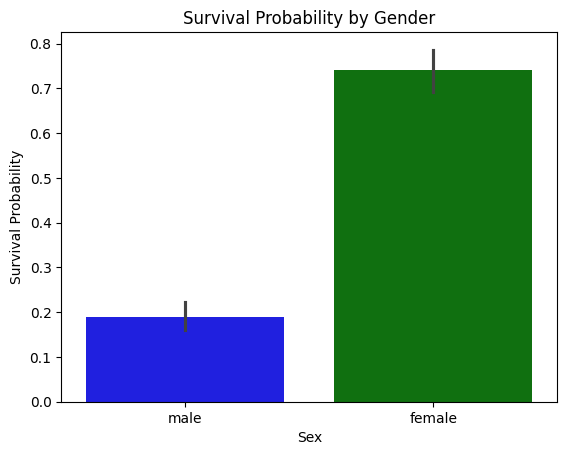

In [22]:
# Data viz / Survival Probability by Gender
palette = {'female': 'green', 'male': 'blue'}
sns.barplot(x='Sex', y='Survived', data=train_df, hue='Sex', palette=palette, dodge=False)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

<h4>Categorical variable: Pclass</h4>

In [23]:
# Value counts of the Pclass column 

train_df['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [24]:
# Mean of survival by passenger class

train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


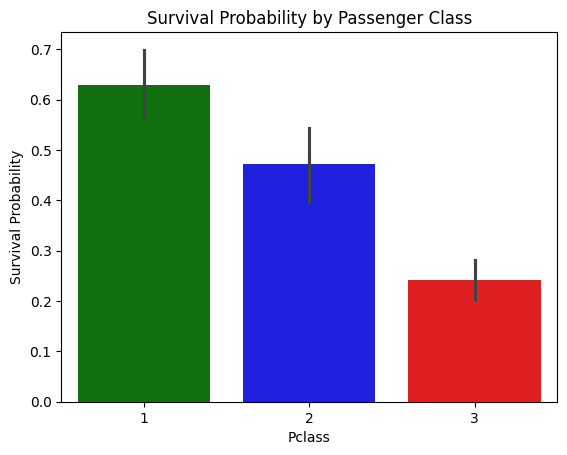

In [29]:
#Data viz / Survival Probability by Passenger Class

palette = {1: 'green', 2: 'blue', 3: 'red'}
sns.barplot(x='Pclass', y='Survived', data=train_df, hue='Pclass', palette=palette, dodge=False)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')
plt.legend([],[], frameon=False)


<h5>Note: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation</h5>

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

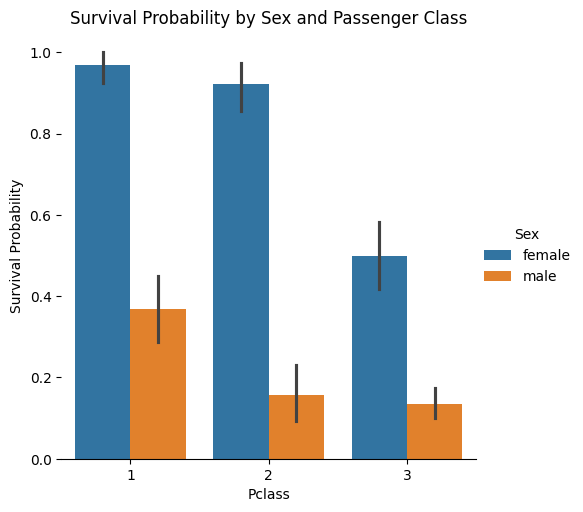

In [31]:
# Dta viz / Survival Probability by gender and passenger class

g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train_df, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')